In [4]:
#help from: http://krasserm.github.io/2019/09/04/super-resolution/ AND https://medium.com/beyondminds/an-introduction-to-super-resolution-using-deep-learning-f60aff9a499d

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = 'REPLACE_WITH_YOUR_FILE_ID'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#!ls "/content/drive/Shared drives/Super Resolution Project"
#!ls "/content/drive/Shared drives/Super Resolution Project/DIV2K_train_LR_x8"
#!ls "/content/drive/Shared drives/Super Resolution Project/DIV2K_train_HR"

Mounted at /content/drive


In [ ]:
#import imageio
#import glob

In [ ]:
'''
hr_dir = "/content/drive/Shareddrives/Super Resolution Project/1to5K/*.png"
lr_dir = "/content/drive/Shareddrives/Super Resolution Project/1to5K3232/*.png"

lr = []
hr = []
for im_path in glob.glob(lr_dir):
    #print(im_path)
    im = imageio.imread(im_path)
    lr.append(im)
    #print(im)
    #print(im.dtype)
    #print(im.shape)
    # do whatever with the image here

for im_path in glob.glob(hr_dir):
    #print(im_path)
    im = imageio.imread(im_path)
    hr.append(im)
    #print(im.shape)
    # do whatever with the image here
'''

In [5]:
import pickle

lr = []
with open("/content/drive/Shareddrives/Super Resolution Project/lrList", 'rb') as fp:
    lr = pickle.load(fp)

hr = []
with open("/content/drive/Shareddrives/Super Resolution Project/hrList", 'rb') as fp:
    hr = pickle.load(fp)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(lr, hr, test_size=0.3, random_state=42)

X_train = tf.convert_to_tensor(X_train)
print(X_train.shape) 
#X_train = tf.reshape(X_train, [3780,3072]) #np.array(X_train).reshape(1,-1)
#print(X_train.shape)

y_train = tf.convert_to_tensor(y_train)
print(y_train.shape)
#y_train = tf.reshape(y_train, [3780,49152]) #np.array(y_train).reshape(1,-1)
#print(y_train.shape)

X_test = tf.convert_to_tensor(X_test)#.reshape(1,-1)
#X_test = tf.reshape(X_test, [1621,3072]) #np.array(y_train).reshape(1,-1)

y_test = tf.convert_to_tensor(y_test)#.reshape(1,-1)
#y_test = tf.reshape(y_test, [1621,49152]) #np.array(y_train).reshape(1,-1)

'''
X_train = np.array(X_train)
print(X_train.shape) 
X_train = X_train.reshape(3780,-1) #np.array(X_train).reshape(1,-1)
print(X_train.shape)
#X_train = X_train.reshape(-1,3780,1024,3) #np.array(X_train).reshape(1,-1)
#print(X_train.shape)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

y_train = np.array(y_train)
print(y_train.shape)
y_train = y_train.reshape(3780,-1) #np.array(y_train).reshape(1,-1)
print(y_train.shape)
#y_train = y_train.reshape(-1,3780,16384,3) #np.array(y_train).reshape(1,-1)
#print(y_train.shape)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

X_test = np.array(X_test)#.reshape(1,-1)
X_test = X_test.reshape(1621,-1) #np.array(y_train).reshape(1,-1)
#X_test = X_test.reshape(-1,1621,1024,3) #np.array(y_train).reshape(1,-1)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

y_test = np.array(y_test)#.reshape(1,-1)
y_test = y_test.reshape(1621,-1) #np.array(y_train).reshape(1,-1)
#y_test = y_test.reshape(-1,1621,16384,3) #np.array(y_train).reshape(1,-1)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
'''

(3780, 32, 32, 3)
(3780, 128, 128, 3)


'\nX_train = np.array(X_train)\nprint(X_train.shape) \nX_train = X_train.reshape(3780,-1) #np.array(X_train).reshape(1,-1)\nprint(X_train.shape)\n#X_train = X_train.reshape(-1,3780,1024,3) #np.array(X_train).reshape(1,-1)\n#print(X_train.shape)\nX_train = tf.convert_to_tensor(X_train, dtype=tf.float32)\n\ny_train = np.array(y_train)\nprint(y_train.shape)\ny_train = y_train.reshape(3780,-1) #np.array(y_train).reshape(1,-1)\nprint(y_train.shape)\n#y_train = y_train.reshape(-1,3780,16384,3) #np.array(y_train).reshape(1,-1)\n#print(y_train.shape)\ny_train = tf.convert_to_tensor(y_train, dtype=tf.float32)\n\nX_test = np.array(X_test)#.reshape(1,-1)\nX_test = X_test.reshape(1621,-1) #np.array(y_train).reshape(1,-1)\n#X_test = X_test.reshape(-1,1621,1024,3) #np.array(y_train).reshape(1,-1)\nX_test = tf.convert_to_tensor(X_test, dtype=tf.float32)\n\ny_test = np.array(y_test)#.reshape(1,-1)\ny_test = y_test.reshape(1621,-1) #np.array(y_train).reshape(1,-1)\n#y_test = y_test.reshape(-1,1621,1638

In [7]:
from tensorflow.keras.layers import Add, Conv2D, Input, Lambda
from tensorflow.keras.models import Model

DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) * 255

def edsr(scale, num_filters=64, num_res_blocks=8, res_block_scaling=None):
    """Creates an EDSR model."""
    x_in = Input(shape=(None, None, 3))
    x = Lambda(normalize)(x_in)

    x = b = Conv2D(num_filters, 3, padding='same')(x)
    for i in range(num_res_blocks):
        b = res_block(b, num_filters, res_block_scaling)
    b = Conv2D(num_filters, 3, padding='same')(b)
    x = Add()([x, b])

    x = upsample(x, scale, num_filters)
    x = Conv2D(3, 3, padding='same')(x)

    x = Lambda(denormalize)(x)
    return Model(x_in, x, name="edsr")


def res_block(x_in, filters, scaling):
    """Creates an EDSR residual block."""
    x = Conv2D(filters, 3, padding='same', activation='relu')(x_in)
    x = Conv2D(filters, 3, padding='same')(x)
    if scaling:
        x = Lambda(lambda t: t * scaling)(x)
    x = Add()([x_in, x])
    return x


def upsample(x, scale, num_filters):
    def upsample_1(x, factor, **kwargs):
        """Sub-pixel convolution."""
        x = Conv2D(num_filters * (factor ** 2), 3, padding='same', **kwargs)(x)
        return Lambda(pixel_shuffle(scale=factor))(x)

    if scale == 2:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
    elif scale == 3:
        x = upsample_1(x, 3, name='conv2d_1_scale_3')
    elif scale == 4:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
        x = upsample_1(x, 2, name='conv2d_2_scale_2')

    return x

def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)


def normalize(x):
    return (x - DIV2K_RGB_MEAN) / 127.5


def denormalize(x):
    return x * 127.5 + DIV2K_RGB_MEAN

In [8]:
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

In [ ]:
#import os

#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

# Create directory for saving model weights
#weights_dir = '/content/drive/Shareddrives/Super Resolution Project/'
#os.makedirs(weights_dir, exist_ok=True)

# EDSR baseline as described in the EDSR paper (1.52M parameters)
#model_edsr = edsr(scale=4, num_res_blocks=16)

# Adam optimizer with a scheduler that halfs learning rate after 200,000 steps
#optim_edsr = Adam(learning_rate=PiecewiseConstantDecay(boundaries=[200000], values=[1e-4, 5e-5]))

# Compile and train model for 300,000 steps with L1 pixel loss
#model_edsr.compile(optimizer=optim_edsr, loss='mean_absolute_error')
#model_edsr.fit(X_train, y_train, epochs=14, steps_per_epoch=32)

# Save model weights
#model_edsr.save_weights(os.path.join(weights_dir, 'weights-edsr-14E.h5'))

In [ ]:
# Create directory for saving model weights
weights_dir = '/content/drive/Shareddrives/Super Resolution Project/'
os.makedirs(weights_dir, exist_ok=True)

# EDSR baseline as described in the EDSR paper (1.52M parameters)
model_edsr = edsr(scale=4, num_res_blocks=16)

# Adam optimizer with a scheduler that halfs learning rate after 200,000 steps
optim_edsr = Adam(learning_rate=PiecewiseConstantDecay(boundaries=[10000], values=[1e-4, 5e-5]))

# Compile and train model for 300,000 steps with L1 pixel loss
model_edsr.compile(optimizer=optim_edsr, loss='mean_absolute_error')
 
model_edsr.load_weights('/content/drive/Shareddrives/Super Resolution Project/weights-edsr-25E.h5')

model_edsr.fit(X_train, y_train, epochs=15, shuffle=True)

# Save model weights
model_edsr.save_weights(os.path.join(weights_dir, 'weights-edsr-40E.h5'))

Epoch 1/15
119/119 [==============================] - 1161s 10s/step - loss: 7.8205
Epoch 2/15
119/119 [==============================] - 1154s 10s/step - loss: 7.6887
Epoch 3/15
119/119 [==============================] - 1157s 10s/step - loss: 7.6215
Epoch 4/15
119/119 [==============================] - 1160s 10s/step - loss: 7.5563
Epoch 5/15
119/119 [==============================] - 1161s 10s/step - loss: 7.5103
Epoch 6/15
119/119 [==============================] - 1158s 10s/step - loss: 7.4421
Epoch 7/15
119/119 [==============================] - 1154s 10s/step - loss: 7.3934
Epoch 8/15
119/119 [==============================] - 1160s 10s/step - loss: 7.3441
Epoch 9/15
119/119 [==============================] - 1159s 10s/step - loss: 7.3024
Epoch 10/15
119/119 [==============================] - 1165s 10s/step - loss: 7.2671
Epoch 11/15
119/119 [==============================] - 1157s 10s/step - loss: 7.2199
Epoch 12/15
119/119 [==============================] - 1161s 10s/step - lo

In [ ]:
# Save model weights
#model_edsr.save_weights(os.path.join('/content/drive/Shareddrives/Super Resolution Project/', 'weights-edsr-16-x4-8Epochs.h5'))

In [9]:
# Create directory for saving model weights
weights_dir = '/content/drive/Shareddrives/Super Resolution Project/'
os.makedirs(weights_dir, exist_ok=True)

# EDSR baseline as described in the EDSR paper (1.52M parameters)
model_edsr = edsr(scale=4, num_res_blocks=16)

# Adam optimizer with a scheduler that halfs learning rate after 200,000 steps
#optim_edsr = Adam(learning_rate=PiecewiseConstantDecay(boundaries=[200000], values=[1e-4, 5e-5]))

# Compile and train model for 300,000 steps with L1 pixel loss
#model_edsr.compile(optimizer=optim_edsr, loss='mean_absolute_error')
 
model_edsr.load_weights('/content/drive/Shareddrives/Super Resolution Project/weights-edsr-40E.h5')

#y1 = model_edsr.predict(tf.reshape(tf.convert_to_tensor(X_test[0]), [1,32,32,3]))

In [ ]:
#from PIL import Image
#import numpy as np

#PIL_image = Image.fromarray(np.asarray(y1).reshape(128,128,3).astype('uint8'), 'RGB')

#PIL_image.save('test.png')

In [18]:
##TESTING https://cvnote.ddlee.cn/2019/09/12/psnr-ssim-python
import skimage
from skimage import measure

totalPSNR = 0
totalSSIM = 0

for i in range(0,len(X_test)):
  y = model_edsr.predict(tf.reshape(tf.convert_to_tensor(X_test[i]), [1,32,32,3]))
  #print(y.shape)
  #print(type(y))
  y = np.asarray(y).reshape(128,128,3).astype('uint8')
  #print(y.shape)
  #print(type(y))

  #print(y_test[i].shape)
  #print(type(y_test[i]))
  yOG = np.asarray(y_test[i]).reshape(128,128,3).astype('uint8')
  #print(yOG.shape)
  #print(type(yOG))

  totalPSNR += skimage.measure.compare_psnr(yOG, y)
  totalSSIM += skimage.measure.compare_ssim(yOG, y, multichannel=True)

print(totalPSNR/len(X_test))
print(totalSSIM/len(X_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


23.63672948020242
0.8124363328596471


In [20]:
from sklearn.metrics import mean_absolute_error

files = ['weights-edsr-5E.h5','weights-edsr-8E.h5','weights-edsr-20E.h5','weights-edsr-25E.h5','weights-edsr-40E.h5']

yTrain = []
yTest = []

for x in files:
  # EDSR baseline as described in the EDSR paper (1.52M parameters)
  model_edsr = edsr(scale=4, num_res_blocks=16)
  model_edsr.load_weights('/content/drive/Shareddrives/Super Resolution Project/' + x)

  trainMAETotal = 0
  for i in range(0,len(X_train)):
    y = model_edsr.predict(tf.reshape(tf.convert_to_tensor(X_train[i]), [1,32,32,3]))
    y = np.asarray(y).reshape(128,128,3).astype('uint8')
    y = np.dot(y[...,:3], [0.2989, 0.5870, 0.1140]).reshape(128,128).astype('uint8')
    yOG = np.asarray(y_train[i]).reshape(128,128,3).astype('uint8')
    yOG = np.dot(yOG[...,:3], [0.2989, 0.5870, 0.1140]).reshape(128,128).astype('uint8')
    trainMAETotal += mean_absolute_error(yOG, y)

  yTrain.append(trainMAETotal/len(X_train))

  testMAETotal = 0
  for i in range(0,len(X_test)):
    y = model_edsr.predict(tf.reshape(tf.convert_to_tensor(X_test[i]), [1,32,32,3]))
    y = np.asarray(y).reshape(128,128,3).astype('uint8')
    y = np.dot(y[...,:3], [0.2989, 0.5870, 0.1140]).reshape(128,128).astype('uint8')
    yOG = np.asarray(y_test[i]).reshape(128,128,3).astype('uint8')
    yOG = np.dot(yOG[...,:3], [0.2989, 0.5870, 0.1140]).reshape(128,128).astype('uint8')
    testMAETotal += mean_absolute_error(yOG, y)

  yTest.append(testMAETotal/len(X_test))

In [23]:
x = [5,8,20,25,40]
print(x)
print(yTrain)
print(yTest)

[5, 8, 20, 25, 40]
[129.66683775886656, 119.84702899266803, 120.60329171639901, 120.62350184526393, 123.52092809929418]
[129.56038681303255, 119.88332999980722, 120.96263970687461, 120.66404758949915, 123.7579133717974]


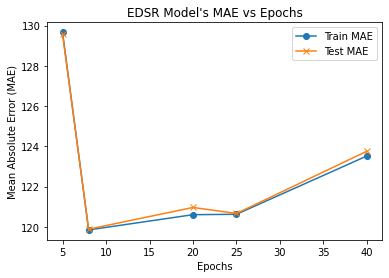

In [28]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.plot(x, yTrain, marker="o", label='Train MAE')
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error (MAE)")
ax.set_title("EDSR Model's MAE vs Epochs")
ax.plot(x, yTest, marker="x", label='Test MAE')
plt.legend()
plt.savefig("MAE.png")